In [2]:
!pip install opencv-contrib-python==3.4.13.47 --force-reinstall
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt



  Using cached https://files.pythonhosted.org/packages/a4/f2/476c618db560b49850e18080ffd6cc299a199b68ca9d853b05e73c913665/opencv_contrib_python-3.4.13.47-cp36-cp36m-manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/14/32/d3fa649ad7ec0b82737b92fefd3c4dd376b0bb23730715124569f38f3a08/numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: opencv-contrib-python 3.4.13.47
    Uninstalling opencv-contrib-python-3.4.13.47:
      Successfully uninstalled opencv-contrib-python-3.4.13.47


In [3]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(1, 3),dtype="uint8")

In [5]:
net = cv2.dnn.readNetFromDarknet('drive/MyDrive/CV_Project/yolo-obj.cfg', 'drive/MyDrive/CV_Project/yolo-obj_final.weights')

In [48]:
image = cv2.imread("drive/MyDrive/CV_Project/Drone_Net_Dataset/Image1711.jpg")
(H, W) = image.shape[:2]

In [49]:
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [50]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()

In [51]:
boxes = []
confidences = []
classIDs = []

In [52]:
# loop over each of the layer outputs
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]
		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > 0.5:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")
			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))
			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

In [53]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.3)

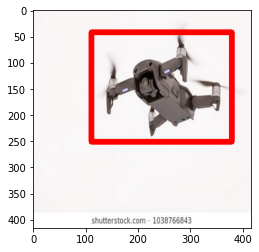

In [54]:
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), [255,0,0], 10)
		
# show the output image
plt.imshow(image)
